In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
sns.set()
plt.rcParams['figure.figsize'] = [8, 6]
%matplotlib inline
#%matplotlib

## Correlations stats

In [48]:
corr = pd.read_csv("genomes_corr.csv")
corr.head()

,corr,bin
0,0.505313,0.0
1,0.667171,0.0
2,0.668826,0.0
3,0.582138,0.0
4,0.567888,0.0


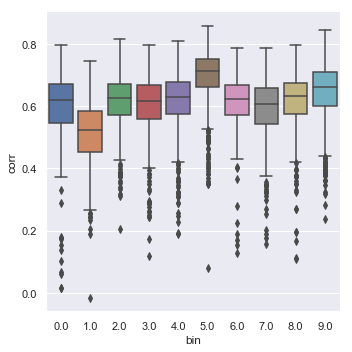

In [49]:
sns.catplot(x='bin', y='corr', data=corr, kind='box')

## PCA 

In [50]:
z_scores = pd.read_csv("genomes_z.csv")

X = z_scores.values
labels = X[:,-1]
X = X[:,:-1]

pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

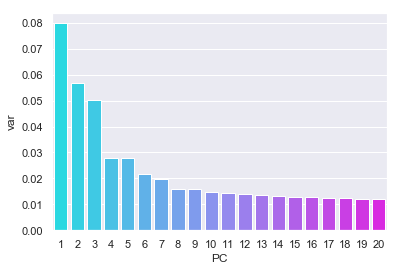

In [51]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

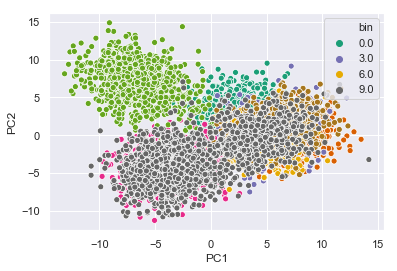

In [52]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['bin']=labels

sns.scatterplot(x='PC1', y='PC2', hue='bin', data=pca_df, palette='Dark2')

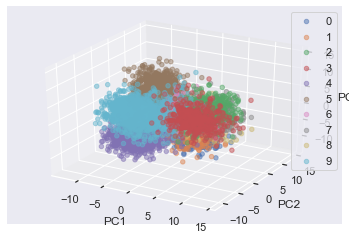

In [53]:
# 3D PCA

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

bins={}
for i in range(max(z_scores['bin'])+1):
    sub = pca_df[pca_df['bin']==i]
    ax.scatter(sub['PC1'], sub['PC2'], sub['PC3'], 
               label=i, alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()